In [9]:
import os
import matplotlib.pyplot as plt
from collections import Counter

from datasets import load_dataset
dataset = load_dataset("webis/Touche23-ValueEval")
data_dir = "llama-2-7b-prompt1-psy"

values = [
    "thought",
    "action",
    "stimulation",
    "hedonism",
    "achievement",
    "dominance",
    "resources",
    "face",
    "personal",
    "society",
    "tradition",
    "rules",
    "interpersonal",
    "humility",
    "caring",
    "dependability",
    "concern",
    "nature",
    "tolerance",
    "objectivity"
]

def decode(answer):
    labels = [0 for i in range(20)]
    for a in answer:
        if a in values:
            labels[values.index(a)] = 1
    return labels

def transform_string(s):
    # Remove parentheses and split by commas
    val = s.strip('()').split(',')
    # Strip any leading or trailing whitespace from each value
    val = [val.strip() for val in val]
    return val

answers_raw = []
with open("../data/" + data_dir + "/final_results.txt", 'r') as file:
    for line in file:
        answer = line.replace(")(",",")
        answer = answer.replace("societal", "society")
        answer = answer.replace("social", "society")
        answer = answer.replace("environmental", "nature")
        answer = answer.replace("environment", "nature")
        answer = answer.replace("egalitarian", "society")     # egalitarian and scientific are only 3 so im gonna assign them to society as
        answer = answer.replace("scientific", "society")      # society is the most picked value
        answer = answer.replace("rule,", "rules,")
        answer = answer.replace("rule)", "rules)")

        answers_raw.append(answer)

key made up by llama2: values


Counter({'concern': 850,
         'society': 504,
         'personal': 390,
         'achievement': 149,
         'tradition': 142,
         'interpersonal': 124,
         'resources': 103,
         'rules': 86,
         'objectivity': 73,
         'dependability': 59,
         'caring': 45,
         'dominance': 44,
         'hedonism': 44,
         'humility': 44,
         'tolerance': 33,
         'action': 31,
         'nature': 30,
         'stimulation': 17,
         'thought': 17,
         'face': 12,
         'values': 1})

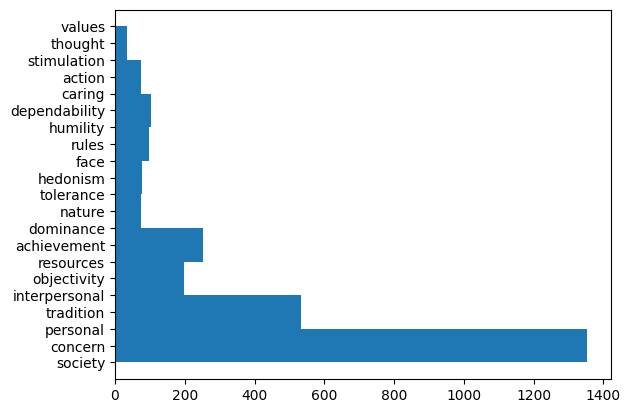

In [10]:
hist_answers = []
for answer in answers_raw:
    for a in transform_string(answer):
        hist_answers.append(a.strip(")"))

plt.hist(hist_answers, orientation='horizontal')
for key in (Counter(hist_answers).keys()):
    if key not in values:
        print(f"key made up by llama2: {key}")

Counter(hist_answers)

In [ ]:
true_labels = [dataset["test"][i]["Labels"] for i in range(len(dataset["test"]))]
predicted_labels = [decode(transform_string(answer)) for answer in answers_raw]

correct = sum([predicted_labels[i] == true_labels[i] for i in range(len(true_labels))])
print(f"precision: {correct / len(predicted_labels)}")

In [6]:
def check_overlap(pred, true):
    for p, t in zip(pred, true):
        if p == t:
            return True
    return False

overlap = sum([check_overlap(p, t) for p, t in zip(predicted_labels, true_labels)])
print(f"overlap in predicted and true labels: {overlap / len(predicted_labels)}")

overlap in predicted and true labels: 1.0


In [7]:
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

for pl, tl in zip(predicted_labels, true_labels):
    # TODO for p in pred for t in true, compare each elem not the whole list!
    for p, t in zip(pl, tl):
        if p == t:
            if p == 1:
                true_positives += 1
            else:
                true_negatives += 1
        else:
            if p == 1:
                false_positives += 1
            else:
                false_negatives +=1

print(true_positives, true_negatives, false_positives, false_negatives)

424 21224 1041 3471


In [8]:
# different scores / metrices:
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives) # coverage
F1_score = (2 * precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_positives + false_negatives + true_negatives + false_positives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1_score: {F1_score}")
print(f"accuracy: {accuracy}")
print(f"specificity: {specificity}")

precision: 0.289419795221843
recall: 0.10885750962772786
F1_score: 0.1582089552238806
accuracy: 0.8275229357798165
specificity: 0.9532450033685156
